In [ ]:
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.datasets import cifar100
import keras
from keras import layers
import numpy as np


In [ ]:
cif10 = cifar10.load_data() 
cif100 = cifar100.load_data(label_mode="fine") 

In [ ]:
x_train10 = cif10[0][0]
y_train10 = cif10[0][1]
x_train10_test = cif10[1][0]
y_train10_test = cif10[1][1]


x_train100 = cif100[0][0]
y_train100 = cif100[0][1]
x_train100_test = cif100[1][0]
y_train100_test = cif100[1][1]

In [ ]:
x_train10[1].shape

(32, 32, 3)

In [ ]:
def feature_normalize(X):
    
    mu     = np.mean(X, 0)
    sigma  = np.std(X, 0)
    X      = (X - mu) / sigma
    X_norm = X
  
    return X_norm

In [ ]:
x_train10 = feature_normalize(x_train10).reshape(x_train10.shape[0], x_train10.shape[1]*x_train10.shape[2]*x_train10.shape[3])
x_train100 = feature_normalize(x_train100).reshape(x_train100.shape[0], x_train100.shape[1]*x_train100.shape[2]*x_train100.shape[3])

x_train10_test = feature_normalize(x_train10_test).reshape(x_train10_test.shape[0], x_train10_test.shape[1]*x_train10_test.shape[2]*x_train10_test.shape[3])
x_train100_test = feature_normalize(x_train100_test).reshape(x_train100_test.shape[0], x_train100_test.shape[1]*x_train100_test.shape[2]*x_train100_test.shape[3])


In [ ]:
#change label encoding
from tensorflow.keras.utils import to_categorical
y_train10 = to_categorical(y_train10)
y_train100 = to_categorical(y_train100)

y_train10_test = to_categorical(y_train10_test)
y_train100_test = to_categorical(y_train100_test)


In [ ]:
y_train10.shape

(50000, 10)

In [ ]:
x_train10[0].shape

(3072,)

In [ ]:
from keras.engine import input_layer
from keras.layers import Dropout

def trainer(X=x_train10, y=y_train10, x_val=x_train10_test, y_val=y_train10_test, list_layers=[256,128,64,10], funcs=['relu','relu', 'relu', 'softmax'], drops=[0,0,0,0], epochs=40, batch_size=64, optim='Adam', loss='categorical_crossentropy'):
  model = keras.Sequential()
  model.add(layers.Dense(list_layers[0], activation=funcs[0], input_shape= X[0].shape))
  if drops[0]:
    model.add(Dropout(drops[0], input_shape=X[0].shape))
    model.add(layers.Dense(list_layers[0], activation=funcs[0]))
  else:
      model.add(layers.Dense(list_layers[0], activation=funcs[0], input_shape= X[0].shape))
  for layer, func, drop in zip(list_layers[1:], funcs[1:], drops[1:]):
    if drop:
      model.add(Dropout(drop))
    model.add(layers.Dense(layer, activation=func))
  model.compile(
    optimizer=optim,  
    loss=loss,
    metrics=['accuracy'])
  history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))
  
  return model, history

In [ ]:
model, hist = trainer(x_train10, y_train10, x_train10_test, y_train10_test, [128,64,64,10], ['relu', 'relu', 'relu', 'softmax'],drops=[0,0,0,0], epochs=40, batch_size=64, optim='Adam', loss='categorical_crossentropy')

In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 422,922
Trainable params: 422,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
layer_dict


{'dense': <keras.layers.core.dense.Dense at 0x7f735bcaff10>,
 'dense_1': <keras.layers.core.dense.Dense at 0x7f735bc08350>,
 'dense_2': <keras.layers.core.dense.Dense at 0x7f735bbc3e90>,
 'dense_3': <keras.layers.core.dense.Dense at 0x7f735bbc7f90>,
 'dense_4': <keras.layers.core.dense.Dense at 0x7f735bbd1b90>}

In [ ]:
filters, biases = layer_dict['dense'].get_weights()

In [ ]:
f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
filters.shape

(3072, 128)

In [ ]:
show_filter = filters[:,0].reshape(32,32,3)

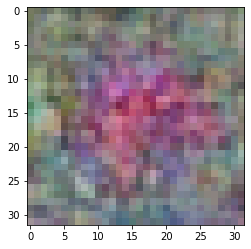

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(show_filter, cmap='viridis')

In [ ]:
model, hist = trainer(x_train10, y_train10, x_train10_test, y_train10_test, [10], ['softmax'],drops=[0,0,0,0], epochs=40, batch_size=64, optim='adam', loss='categorical_crossentropy')

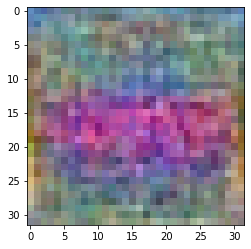

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
filters, biases = layer_dict['dense_7'].get_weights()
f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)
show_filter = filters[:,0].reshape(32,32,3)
import matplotlib.pyplot as plt
plt.imshow(show_filter)

In [ ]:
layer_dict

{'dense_7': <keras.layers.core.dense.Dense at 0x7f7350293090>,
 'dense_8': <keras.layers.core.dense.Dense at 0x7f72e29f99d0>}

In [ ]:
y_train10[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

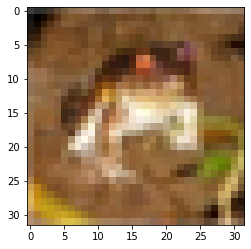

In [ ]:
plt.imshow(cif10[0][0][0].reshape(32,32,3) )

In [ ]:
#X, y, x_val, y_val, list_layers, funcs, drops, epochs, batch_size, optim, loss can all be changed for experiments

EXP={'layer_exp':{'layer':([10],[64,10], [128,64,10], [256,128,64,10],[512,256,128,64,10], [1024,512,256,128,10]),
                'tf_funcs':(['softmax'], ['relu','softmax'], ['relu','relu','softmax'], ['relu','relu','relu','softmax'], ['relu','relu','relu','relu','softmax'],['relu','relu','relu','relu','softmax']),
                'history':[]},
     
     'drop_exp':{'drops': ([0,0,0,0],[0,0.2,0,0.2], [0,0.3,0,0.3], [0,0.5,0,0.5]),
                  'history': []},
     'optim_exp':{'optims':('SGD', 'RMSprop', 'Adam'),
                  'history':[]}}

In [ ]:
for l, f in zip(EXP['layer_exp']['layer'], EXP['layer_exp']['tf_funcs']):
  _, hist = trainer(list_layers=l, funcs=f)
  EXP['layer_exp']['history'].append(hist)

In [ ]:
for o in EXP['optim_exp']['optims']:
  _, hist = trainer(optim=o)
  EXP['optim_exp']['history'].append(hist)

In [ ]:
for d in EXP['drop_exp']['drops']:
  _, hist = trainer(drops=d)
  EXP['drop_exp']['history'].append(hist)

In [ ]:
EXP

{'drop_exp': {'drops': ([0, 0, 0, 0],
   [0, 0.2, 0, 0.2],
   [0, 0.3, 0, 0.3],
   [0, 0.5, 0, 0.5]),
  'history': [<keras.callbacks.History at 0x7fe098de69d0>,
   <keras.callbacks.History at 0x7fe098bcf390>]},
 'layer_exp': {'history': [<keras.callbacks.History at 0x7fe110501c90>,
  'layer': ([10],
   [64, 10],
   [128, 64, 10],
   [256, 128, 64, 10],
   [512, 256, 128, 64, 10],
   [1024, 512, 256, 128, 10]),
  'tf_funcs': (['softmax'],
   ['relu', 'softmax'],
   ['relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'relu', 'softmax'])},
 'optim_exp': {'history': [<keras.callbacks.History at 0x7fe09d3486d0>,
  'optims': ('SGD', 'RMSprop', 'Adam')}}

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


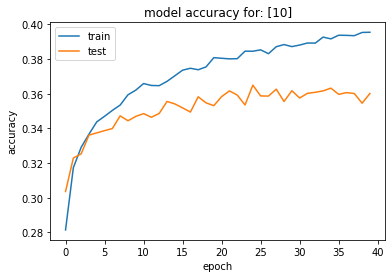

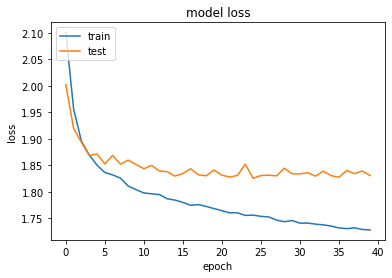

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


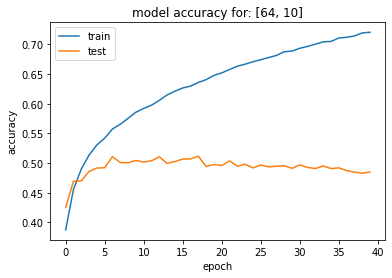

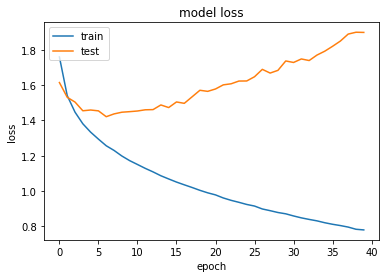

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


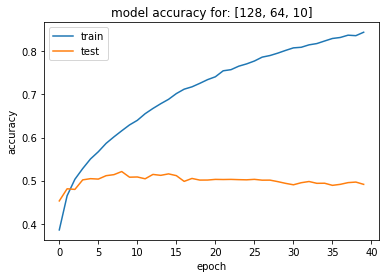

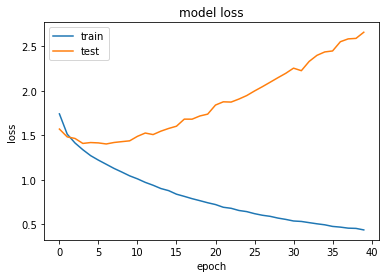

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


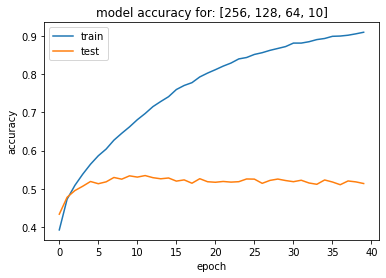

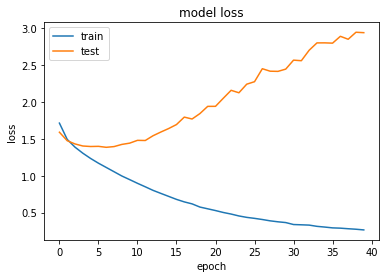

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


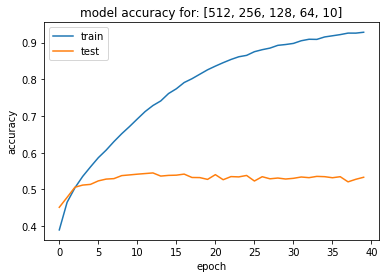

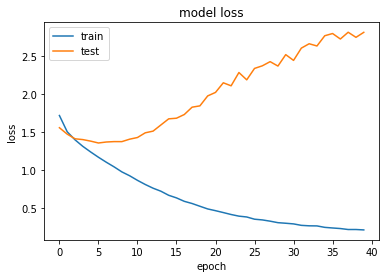

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


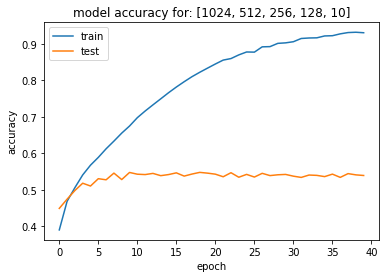

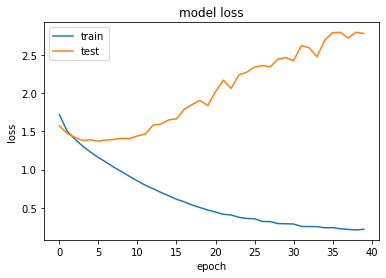

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['layer_exp']['history'])):
  history = EXP['layer_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  t = 'model accuracy for: ' + str(EXP['layer_exp']['layer'][i])
  plt.title(t)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
k = [5,6,7]
str(k)

'[5, 6, 7]'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


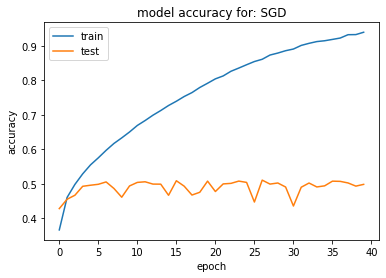

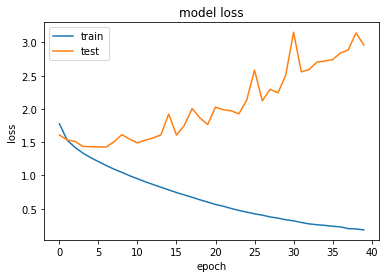

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


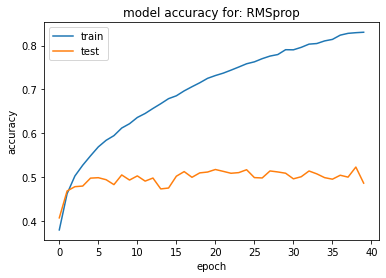

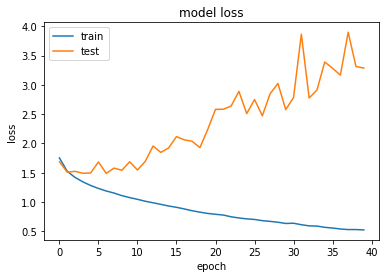

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


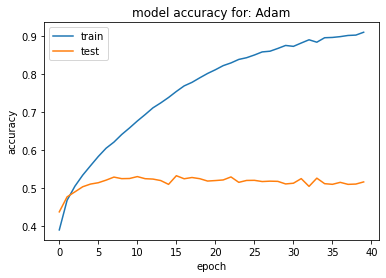

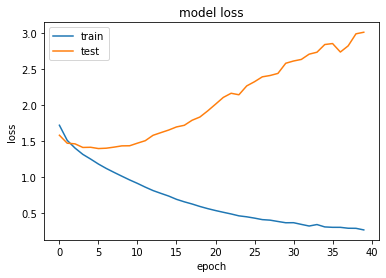

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['optim_exp']['history'])):
  history = EXP['optim_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  t = 'model accuracy for: ' + str(EXP['optim_exp']['optims'][i])
  plt.title(t)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


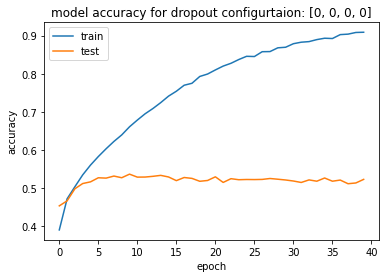

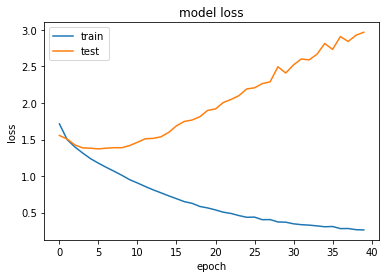

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


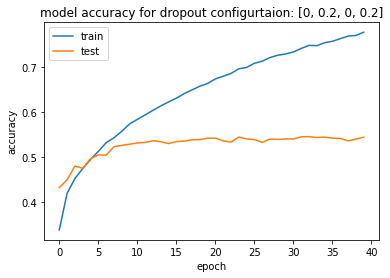

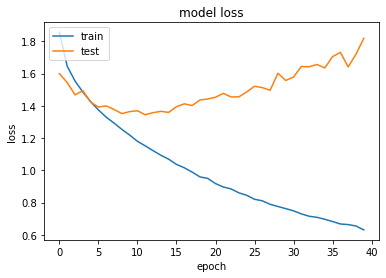

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


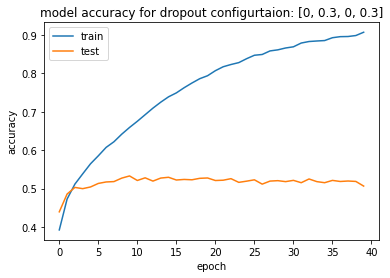

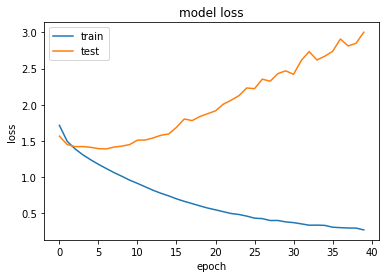

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


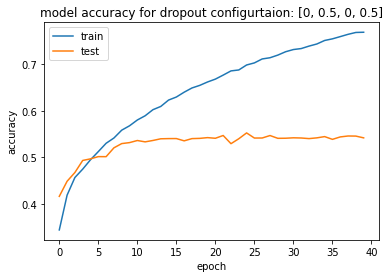

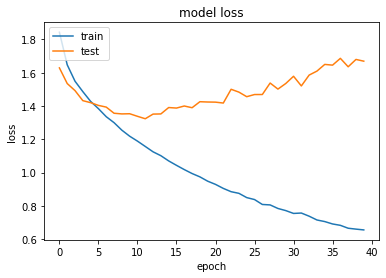

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['drop_exp']['drops'])):
  history = EXP['drop_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  t = 'model accuracy for dropout configurtaion: ' + str(EXP['drop_exp']['drops'][i])
  plt.title(t)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


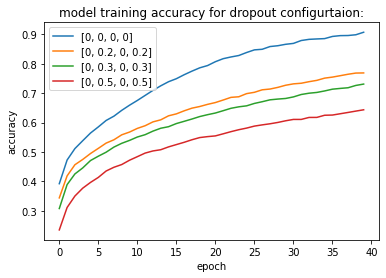

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['drop_exp']['drops'])):
  history = EXP['drop_exp']['history'][i+2]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])
t = 'model training accuracy for dropout configurtaion:'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['drop_exp']['drops'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


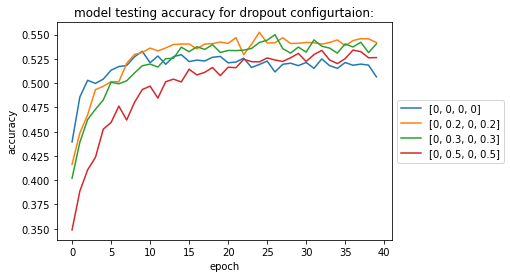

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['drop_exp']['drops'])):
  history = EXP['drop_exp']['history'][i+2]
  print(history.history.keys())
  # summarize history for accuracy
  #plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
t = 'model testing accuracy for dropout configurtaion:'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['drop_exp']['drops'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


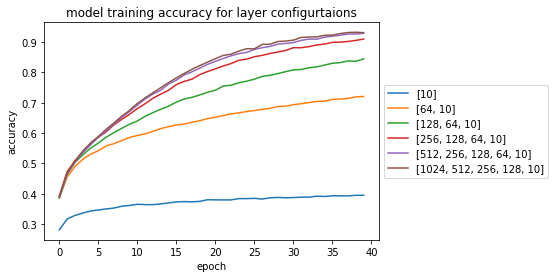

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['layer_exp']['layer'])):
  history = EXP['layer_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])
t = 'model training accuracy for layer configurtaions'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['layer_exp']['layer'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


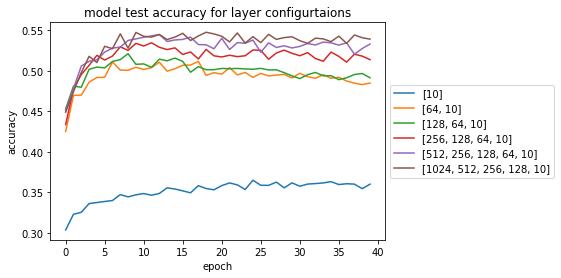

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['layer_exp']['layer'])):
  history = EXP['layer_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  #plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
t = 'model test accuracy for layer configurtaions'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['layer_exp']['layer'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


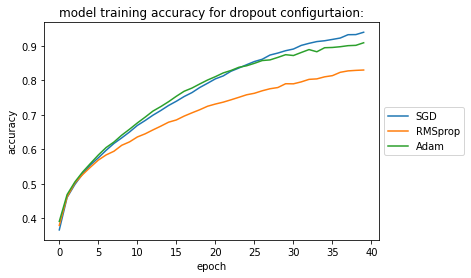

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['optim_exp']['optims'])):
  history = EXP['optim_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_accuracy'])
t = 'model training accuracy for dropout configurtaion:'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['optim_exp']['optims'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


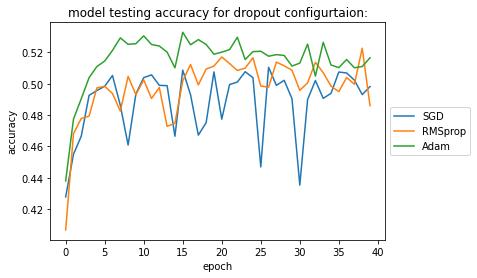

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(EXP['optim_exp']['optims'])):
  history = EXP['optim_exp']['history'][i]
  print(history.history.keys())
  # summarize history for accuracy
  #plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
t = 'model testing accuracy for dropout configurtaion:'
plt.title(t)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(EXP['optim_exp']['optims'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
EXP

{'drop_exp': {'drops': ([0, 0, 0, 0],
   [0, 0.2, 0, 0.2],
   [0, 0.3, 0, 0.3],
   [0, 0.5, 0, 0.5]),
  'history': [<keras.callbacks.History at 0x7fe098de69d0>,
   <keras.callbacks.History at 0x7fe0a4206a10>]},
 'layer_exp': {'history': [<keras.callbacks.History at 0x7fe110501c90>,
  'layer': ([10],
   [64, 10],
   [128, 64, 10],
   [256, 128, 64, 10],
   [512, 256, 128, 64, 10],
   [1024, 512, 256, 128, 10]),
  'tf_funcs': (['softmax'],
   ['relu', 'softmax'],
   ['relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'relu', 'softmax'],
   ['relu', 'relu', 'relu', 'relu', 'softmax'])},
 'optim_exp': {'history': [<keras.callbacks.History at 0x7fe09d3486d0>,
  'optims': ('SGD', 'RMSprop', 'Adam')}}

In [ ]:
model100, hist100 = trainer(x_train100, y_train100, x_train100_test, y_train100_test, [2056, 1024, 512, 256, 128, 128, 100], ['relu','relu','relu','relu','relu','relu','softmax'],drops=[0,0.2,0,0.2, 0, 0.2,0], epochs=60, batch_size=64, optim='adam', loss='categorical_crossentropy')

In [ ]:
model100.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 2056)              6318088   
                                                                 
 dense_93 (Dense)            (None, 2056)              4229192   
                                                                 
 dropout_16 (Dropout)        (None, 2056)              0         
                                                                 
 dense_94 (Dense)            (None, 1024)              2106368   
                                                                 
 dense_95 (Dense)            (None, 512)               524800    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_96 (Dense)            (None, 256)             